# Исследование объявлений о продаже квартир

На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от удаленности от центра. Проведена предобработка данных. Добавлены новые данные. Построены гистограммы, боксплоты, диаграммы рассеивания. Исследовательский анализ данных

### Общий вывод

В ходе проведения проектной работы мы использовали архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.  
Анализ проводился по следующим данным:  
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.  

В ходе исследования установлено:  
- наибольшее количество квартир имеют площадь около 50 кв.м. Квартиры площадью более 100 кв.м. встречаются редко, соответственно в большинстве квартир жилая площадь 15-35 кв.м., а площадь кухни 5-10 кв.м.;
- по ценам на квартиры довольно большой разброс, но большинство квартир продаются по цене 2,5-5 млн.руб. Реже встречаются квартиры стоимостью более 10 млн.руб. Но есть и квартиры до 500 тыс.руб.;
- в значительной части продающихся квартир 1-2 комнаты, чуть реже встречаются квартиры с тремя комнатами, студии и квартиры, имеющие более 4 комнат, встречаются значительно реже;
- в продающихся квартирах преобладает стандартная высота потолков - 2,5-3 м;
- абсолютное большинство домов имеют 5 этажей, чуть реже встречаются дома в 9 этажей, соответственно наибольшее количество квартир расположены на 1-5 этажах, с увеличением этажа этот показатель падает. Квартир на первых и последних этажах значительно меньше, чем остальных;
- в большинстве объявлений расстояние до центра города 10-15 км. Также во многих объявлениях не был указан этот параметр, предположительно это объявления о продаже квартир в небольших населенных пунктах;
- основная часть квартир расположена в 10-40 км от аэропорта;
- расстояние до ближайшего парка до 1 км. На показатель влияет разброс парков в населенном пункте - небольшие парки часто расположены недалеко от жилой застройки. 
- большинство объявлений публикуют в рабочий день. В выходные этот показатель снижен;
- количество публикаций снижается в декабре-январе и в летние месяцы.

Анализ скорости продажи квартир показал, что основная часть продаж проходит в первые 50-100 дней, что можно считать быстрой продажей. Реже встречаются продажи до 200 дней. Долгими можно считать продажи более 1 года.  
  
На стоимость квартиры в значительной степени влияет площадь квартиры, в том числе жилая, но, в то же время, размер кухни не является фактором, увеличивающим стоимость. Также пропорционально площади квартиры увеличивается количество комнат, что тоже влияет на стоимость. А вот этаж, на котором расположена квартира, несущественно отражается на общей стоимости.   
День недели, месяц публикации объявления абсолютно не сказываются на стоимости квартиры. При анализе данных обратили внимание, что цена квартир была высокая в 2014 году и постепенно снижалась.   
При расчете средней цены за один квадратный метр было установлено, что самая высокая стоимость квадратного метра в поселке Шушары - 114856 рублей, а самая низкая стоимость квадратного метра в городе Всеволожск - 58141 рублей.  

Помимо прочего, был проведен анализ цены квадратного метра в г. Санкт-Петербурге в зависимости от удаления от центра города. Выявлено, что цена квадратного метра заметно снижается при удалении от центра города.  
  
  
В ходе проведения предобработки данных было выявлено значительное количество пропусков в столбцах:  
- высота потолков
- жилая площадь
- наличие балкона
- название населенного пункта  

Можно предположить, что это ошибка в заполнении или выгрузки данных. Или при заполнении объявления отсутствовали документы с данными, необходимыми для заполнения.  
  

Также, для улучшения сбора данных рекомендовано автоматизировать расчет таких показателей, как:
- расстояние до центра города,
- расстояние до аэропорта,
- расстояние до ближайшего водоема.


### Изучим общую информацию

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.info() # изучаем общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Обращаем внимание, что в некоторых столбцах:   
- есть пропуски
- некорректный тип данных

In [3]:
pd.set_option('display.max_columns', None)
data.head() # рассмотрим таблицу

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

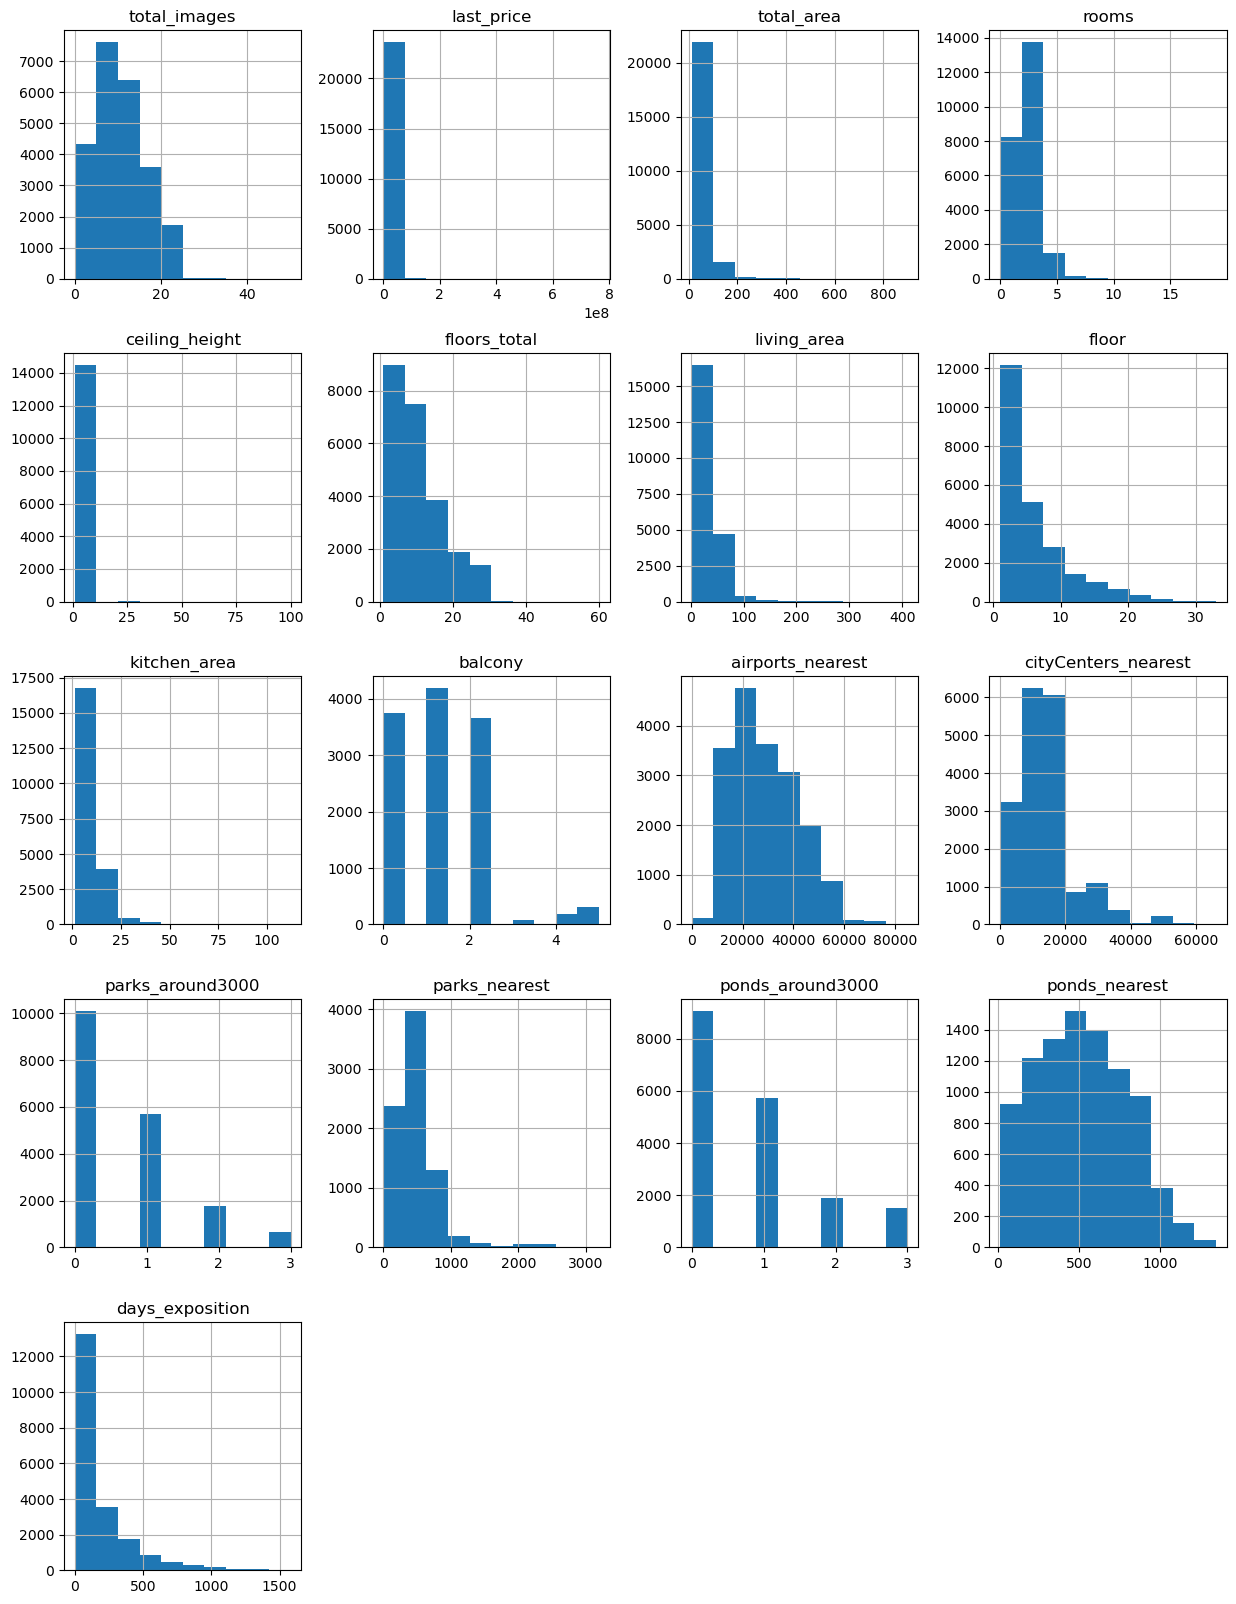

In [4]:
data.hist(figsize=(15, 20)) # строим гистограмму таблицы

Визуально видно, что по многим столбцам есть вбросы, например, ceiling_height

### Предобработка данных

In [5]:
data.isna().sum() # ищем пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# пропуски в столбце ceiling_height заменяем на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby(['open_plan'])['ceiling_height'].transform('median'))
data['ceiling_height'].isna().sum() # проверяем

0

Предположительно, при заполнении данных отсутствовала информация по высоте потолков. Заменяем пропуски медианным значением по столбцу

In [7]:
# пропуски в столбце floors_total заменяем на медианное значение
data['floors_total'] = data['floors_total'].fillna(data.groupby(['open_plan'])['floors_total'].transform('median'))
data['floors_total'].isna().sum() # проверяем

0

Скорее всего пользователь при заполнении форм не стал указывать данную информацию. Заменяем пропуски медианным значением по столбцу

In [8]:
data['living_area'] = (
    data['living_area']
    .fillna(data['total_area'] 
    * (data['living_area']/data['total_area']).mean()) # заменяем пропуски
)
data['living_area'].isna().sum() # проверяем

0

Пользователь при заполнении форм не стал указывать данную информацию или этих данных у него не было. Жилая площадь помещения пропорциональная общей площади помещения, поэтому находим средний коэффициент отношения жилой площади к общей площади по всей таблице и заменяем пропуски в living_area на total_area, умноженной на найденный коэффициент

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False) # заменяем пропуски на False
data['is_apartment'].isna().sum() # проверяем

0

В столбце is_apartment довольно большое количество пропусков. Можно предположить, что владельцы апартаментов заполнили значение True, а остальные пользователи пропустили этот пункт. Поэтому заменяем пропуски в столбце на False

In [10]:
data['kitchen_area'] = (
    data['kitchen_area']
    .fillna(data['total_area'] 
    * (data['kitchen_area']/data['total_area']).mean()) # заменяем пропуски
)
data['kitchen_area'].isna().sum() # проверяем

0

Пропуски в столбце kitchen_area предлагаю заполнить по принципу заполнения living_area.  
Пользователь при заполнении форм не стал указывать данную информацию или этих данных у него не было. Площадь кухни пропорциональная общей площади помещения, поэтому находим средний коэффициент отношения площади кухни к общей площади по всей таблице и заменяем пропуски в kitchen_area на total_area, умноженной на найденный коэффициент

In [11]:
# предположим, что количество балконов зависит от количества комнат в квартире
# проверим зависимость количества балконов от количества комнат в кварите
print(data['balcony'].corr(data['rooms']))
data.pivot_table(index='rooms', values='balcony', aggfunc=['sum','count','mean'])

0.017990629976926836


,sum,count,mean
,balcony,balcony,balcony
rooms,,,
0,199.0,126,1.579365
1,4635.0,4228,1.096263
2,4567.0,4130,1.105811
3,3859.0,2954,1.306364
4,561.0,528,1.062500
5,133.0,139,0.956835
6,25.0,37,0.675676
7,25.0,27,0.925926


В среднем в квартире один балкон, независимо от количества комнат.  
В старых домах зачастую нет балконов на первых этажах. Но так как у нас нет данных о годе постройки дома, предположим, что по одному балкону есть в каждой квартире.

In [12]:
data['balcony'] = data['balcony'].fillna(1) # заменяем пропуски
data['balcony'].isna().sum() # проверяем

0

В столбце balcony довольно большое количество пропусков. Предполагаю, что балкон в квартирах есть, но в связи с технической ошибкой этот столбец не заполнен.   


In [13]:
data = data.dropna(subset=['locality_name']) # удаляем пропуски
data['locality_name'].isna().sum() # проверяем

0

В столбце locality_name 49 пропущенных значений. Скорее всего этот пункт является обязательным при заполнении объявления о продаже недвижимости и причина появления пропусков - ошибка выгрузки данных.
Рыночная стоимость объекта недвижимости значительно зависит от его местоположения. Поэтому удаляем строки с пропусками

In [14]:
columns_to_replace = (
    ['airports_nearest', 'cityCenters_nearest', 'parks_around3000'
     , 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
)
for column in columns_to_replace:
    data[column] = data[column].fillna(0) # заменяем пропуски на 0

При заполнении данных airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest пользователь не стал указывать данную информацию или этих данных у него не было. Ввиду отстутствия информации, данные пропуски не получится заполнить корректно. Заменим пропуски на 0  
  
Пропуски в столбце days_exposition говорят о том, что объявление еще не снято с публикации. Оставляем столбец без изменений 


In [15]:
data.isna().sum() # проверяем всю таблицу

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

In [16]:
data.dtypes # изучим повторно информацию о таблице, нас интересуют типы данных

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [17]:
# изменяем тип столбца first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
# изменяем тип столбцов floors_total, balcony, days_exposition
data[['floors_total', 'balcony']] = data[['floors_total', 'balcony']].astype('int')


first_day_exposition - тип object, так как в этом столбце указана дата, необходимо заменить тип на datetime  
floors_total - тип float, этажность дома не может быть вещественным числом, заменяем на int  
balcony - тип float, количество балконов не может быть вещественным числом, заменяем на int    



In [19]:
data.dtypes # проверяем

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [20]:
data['locality_name'].unique() # изучаем уникальные значения названия населенных пунктов


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
# меняем название
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True) 
data['locality_name'].unique() # проверяем

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [22]:
# в столбце last_price цена указана в тысячах, корректируем
data.loc[data['last_price'] < 400000, 'last_price'] *= 1000
# в столбце ceiling_height потолки ниже 2 м, заменяем на медианное значение
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = data['ceiling_height'].median()
# в столбце ceiling_height потолки выше 20 м, делим на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10

В столбце last_price цена указана в тысячах.  
В столбце ceiling_height потолки ниже 2 м, заменяем на медианное значение.  
В столбце ceiling_height потолки выше 20 м, делим на 10.  

In [23]:
# добавляем столбец с ценой квадратного метра
data.insert(3,'meter_price', data['last_price']/data['total_area'])
data['meter_price'] = round(data['meter_price'], 2)

In [24]:
# добавляем столбец с днем недели публикации объявления
data.insert(5,'weekday', data['first_day_exposition'].dt.weekday)

In [25]:
# добавляем месяц публикации объявления
data.insert(6,'month', pd.DatetimeIndex(data['first_day_exposition']).month)

In [26]:
# добавляем год публикации объявления
data.insert(7,'year', pd.DatetimeIndex(data['first_day_exposition']).year)

In [27]:
# добавляем тип этажа квартиры
def number_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(number_floor, axis=1)
data.head() # проверяем

,total_images,last_price,total_area,meter_price,first_day_exposition,weekday,month,year,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_type
0,20,13000000.0,108.0,120370.37,2019-03-07,3,3,2019,3,2.70,16,51.000000,8,False,False,False,25.000000,1,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,другой
1,7,3350000.0,40.4,82920.79,2018-12-04,1,12,2018,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,первый
2,10,5196000.0,56.0,92785.71,2015-08-20,3,8,2015,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,другой
3,0,64900000.0,159.0,408176.10,2015-07-24,4,7,2015,3,2.65,14,89.797718,9,False,False,False,29.789403,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,другой
4,2,10000000.0,100.0,100000.00,2018-06-19,1,6,2018,2,3.03,14,32.000000,13,False,False,False,41.000000,1,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,другой


In [28]:
# корректируем расстояние до центра города, переводим в километры
data['cityCenters_nearest'] /= 1000
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
data.head() # проверяем

,total_images,last_price,total_area,meter_price,first_day_exposition,weekday,month,year,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_type
0,20,13000000.0,108.0,120370.37,2019-03-07,3,3,2019,3,2.70,16,51.000000,8,False,False,False,25.000000,1,Санкт-Петербург,18863.0,16,1.0,482.0,2.0,755.0,NaN,другой
1,7,3350000.0,40.4,82920.79,2018-12-04,1,12,2018,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18,0.0,0.0,0.0,0.0,81.0,первый
2,10,5196000.0,56.0,92785.71,2015-08-20,3,8,2015,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13,1.0,90.0,2.0,574.0,558.0,другой
3,0,64900000.0,159.0,408176.10,2015-07-24,4,7,2015,3,2.65,14,89.797718,9,False,False,False,29.789403,0,Санкт-Петербург,28098.0,6,2.0,84.0,3.0,234.0,424.0,другой
4,2,10000000.0,100.0,100000.00,2018-06-19,1,6,2018,2,3.03,14,32.000000,13,False,False,False,41.000000,1,Санкт-Петербург,31856.0,8,2.0,112.0,1.0,48.0,121.0,другой


### Исследовательский анализ данных

### Изучим параметры объектов

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

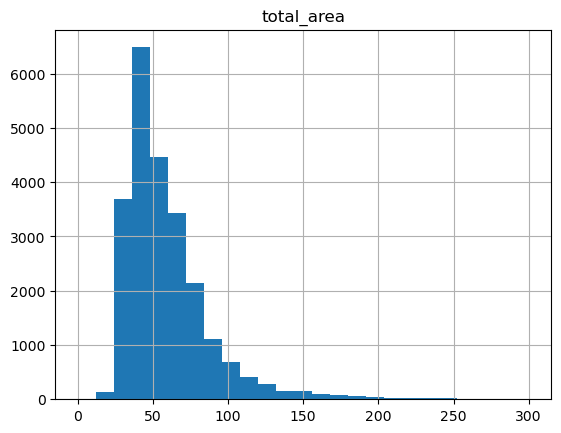

In [29]:
data.hist(column='total_area', bins=25, range=(0, 300)) # строим гистограмму значений общей площади помещения 

Наибольшее количество квартир имеют площадь около 50 кв.м. Квартиры площадью более 100 кв.м. встречаются редко

array([[<Axes: title={'center': 'living_area'}>]], dtype=object)

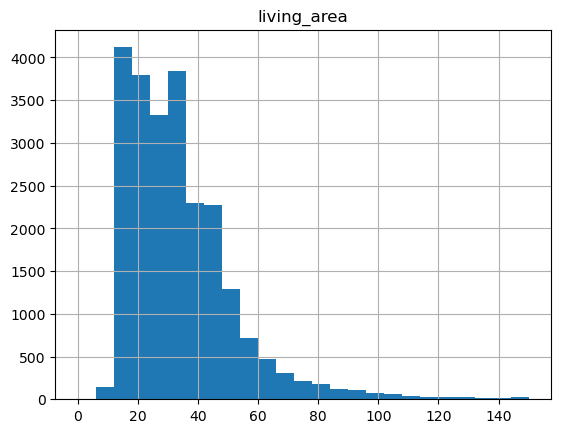

In [30]:
data.hist(column='living_area', bins=25, range=(0, 150)) # строим гистограмму значений жилой площади помещения 

Наибольшее количество квартир имеют жилую площадь 15-35 кв.м. Квартиры с жилой площадью более 60 кв.м. встречаются редко

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

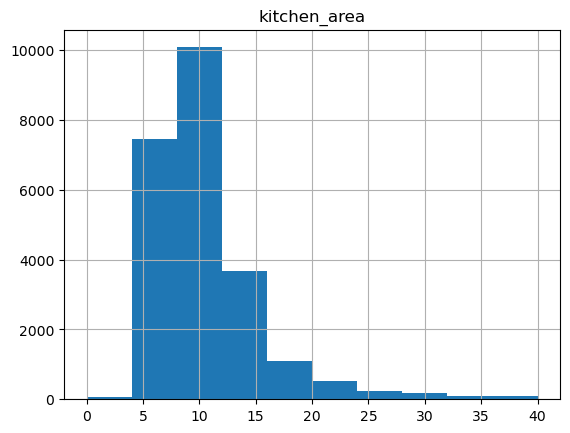

In [31]:
data.hist(column='kitchen_area', bins=10, range=(0, 40)) # строим гистограмму значений площади кухни 

Наиболее часто встречаются объявления с кухней площадью 5-10 кв.м. 

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

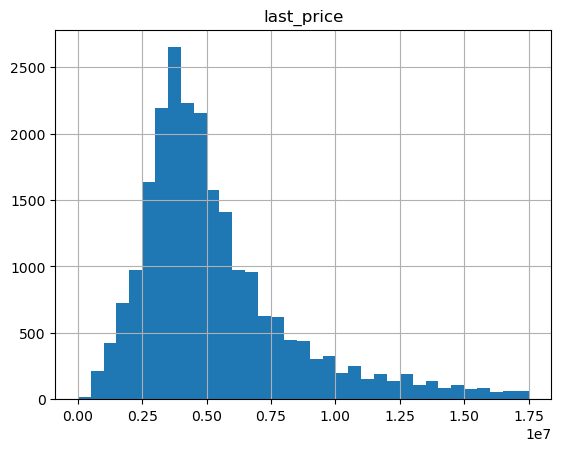

In [32]:
data.hist(column='last_price', bins=35, range=(0, 17500000)) # строим гистограмму значений стоимости квартиры 

Наибольшее количество квартир продаются по цене 2,5-5 млн.руб. Реже встречаются квартиры стоимостью более 10 млн.руб. Но есть и квартиры до 500 тыс.руб.

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

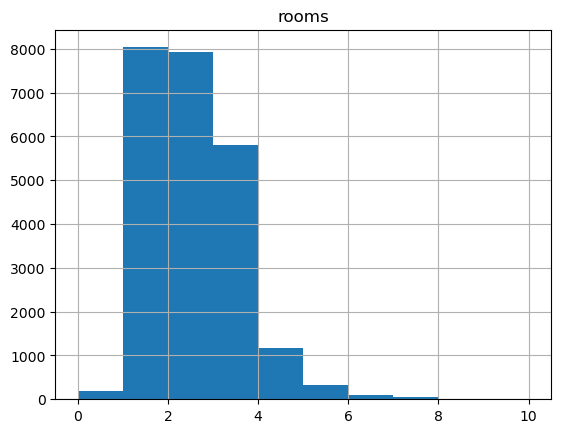

In [33]:
data.hist(column='rooms', bins=10, range=(0, 10)) # строим гистограмму количетсва комнат

В значительной части продающихся квартир 1-2 комнаты, чуть реже встречаются квартиры с тремя комнатами

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

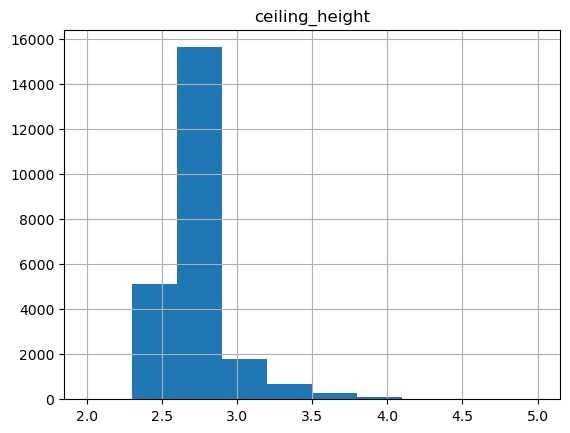

In [34]:
data.hist(column='ceiling_height', bins=10, range=(2, 5)) # строим гистограмму показателя высоты потолков

В наибольшем количестве квартир высота потолков 2,5-3 м. Вероятно, на показатель в значительной степени повлияло заполнение пропусков медианным значением

array([[<Axes: title={'center': 'floor'}>]], dtype=object)

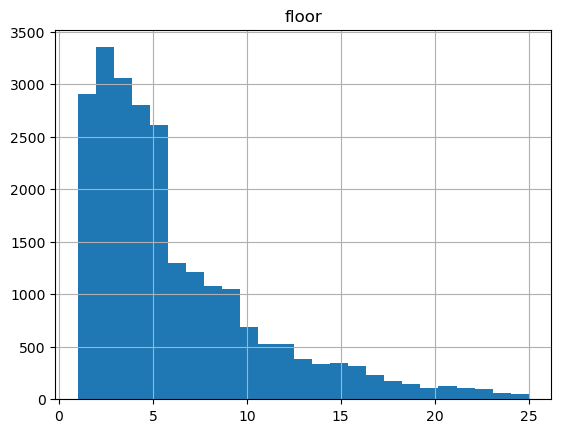

In [35]:
data.hist(column='floor', bins=25, range=(1, 25)) # строим гистограмму значений этажа, на котором расположена квартира

Наибольшее количество квартир расположены на 1-5 этажах. Вероятно, это связано с этажностью дома. Ниже мы проведем анализ этажности для подтверждения гипотезы

<Axes: >

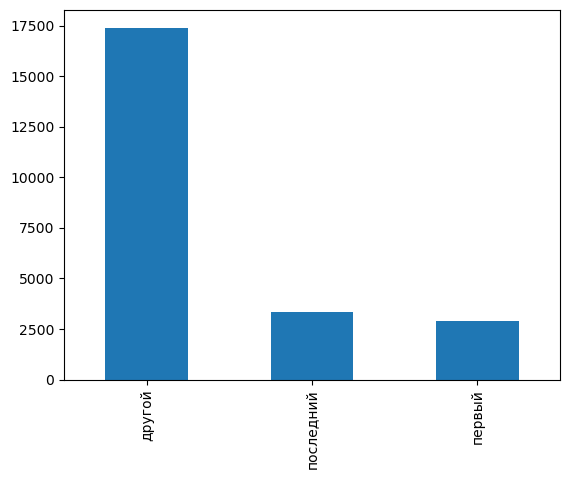

In [36]:
data['floor_type'].value_counts().plot(kind='bar') # строим гистограмму типа этажа

Ожидаемо квартир на первых и последних этажах значительно меньше, чем остальных

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

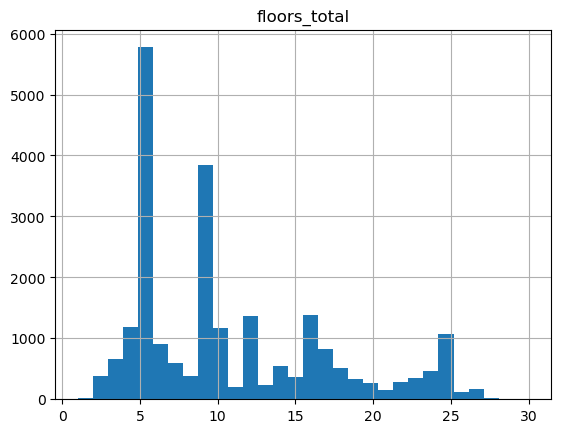

In [37]:
data.hist(column='floors_total', bins=30, range=(1, 30)) # строим гистограмму общего количества этажей в доме

Наибольшее количество домов имеют 5 и 9 этажей. 

<Axes: >

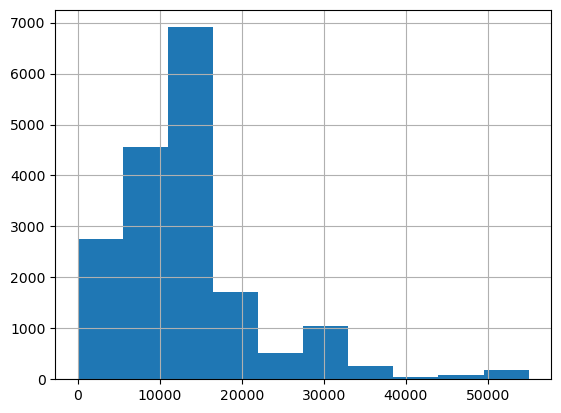

In [38]:
(data['cityCenters_nearest']*1000).hist(bins=10, range=(1, 55000)) # строим гистограмму расстояния до центра города

В большинстве объявлений расстояние до центра города 10-15 км. Также во многих объявлениях не был указан этот параметр, предположительно это объявления о продаже квартир в небольших населенных пунктах

array([[<Axes: title={'center': 'airports_nearest'}>]], dtype=object)

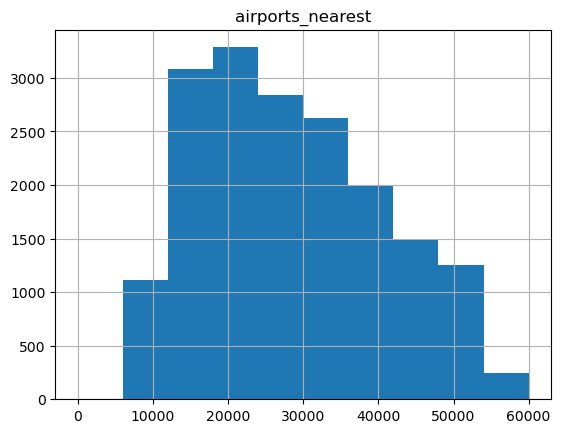

In [39]:
data.hist(column='airports_nearest', bins=10, range=(1, 60000)) # строим гистограмму расстояния до ближайшего аэропорта

Основная часть квартир расположена в 10-40 км от аэропорта. Предположительно ближе 10 км строить дома запрещено

array([[<Axes: title={'center': 'parks_nearest'}>]], dtype=object)

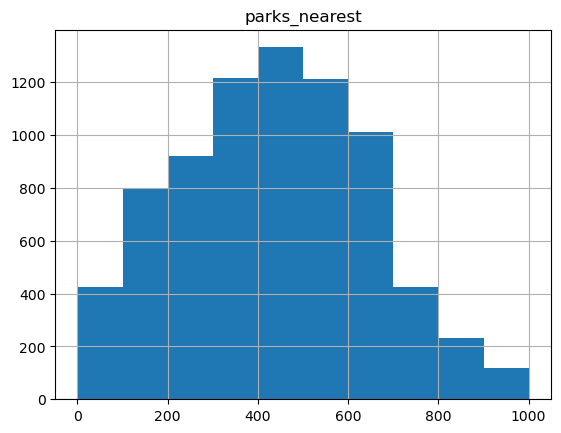

In [40]:
data.hist(column='parks_nearest', bins=10, range=(1, 1000)) # строим гистограмму расстояния до ближайшего парка

Расстояние до ближайшего парка до 1 км. На показатель влияет разброс парков в населенном пункте - небольшие парки часто расположены недалеко от жилой застройки. Также, вероятно, что пользователи могли не указать расстояние, если парк находится в удалении

array([[<Axes: title={'center': 'weekday'}>]], dtype=object)

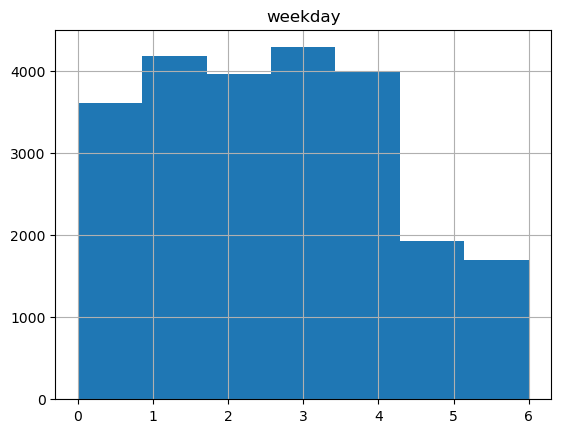

In [41]:
data.hist(column='weekday', bins=7) # строим гистограмму дня недели публикации объявления

Большинство объявлений публикуют в рабочий день. В выходные этот показатель снижен

array([[<Axes: title={'center': 'month'}>]], dtype=object)

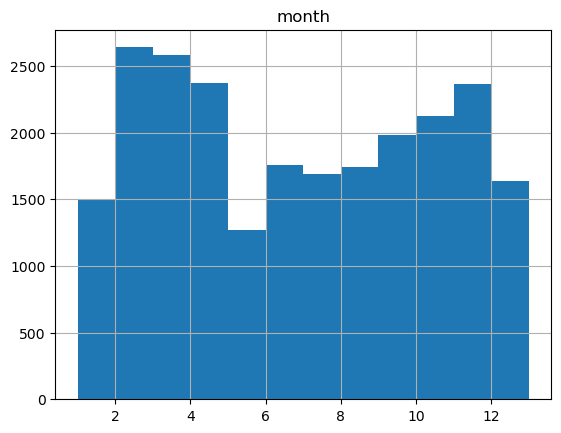

In [42]:
data.hist(column='month', bins=12, range=(1, 13)) # строим гистограмму месяца публикации объявления

Количество публикаций снижается в декабре-январе и в летние месяцы. Вероятно это связано отпусками 

### Изучим скорость продажи квартир

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

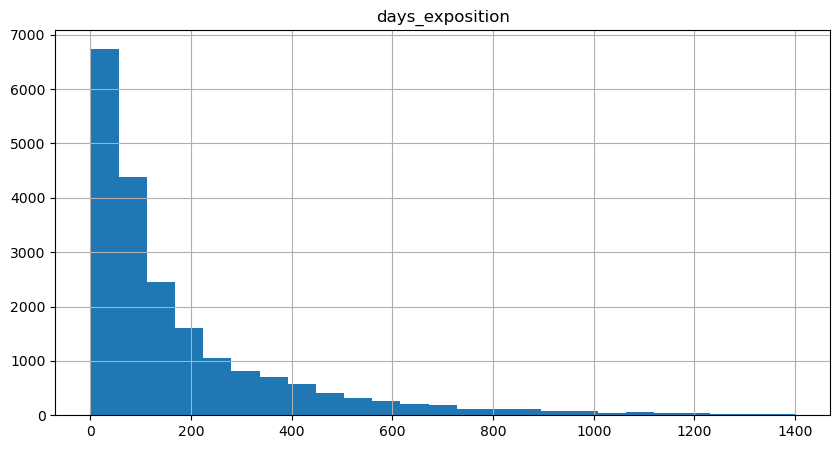

In [43]:
# изучаем скорость продажи квартир
data.hist(column='days_exposition', bins=25, range=(0, 1400), figsize=(10, 5))


In [44]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

180.7531998045921
95.0


Основная часть продаж проходит в первые 50-100 дней, что можно считать быстрой продажей. Реже встречаются продажи до 200 дней. Долгими можно считать продажи более 1 года. 

### Изучим факторы, влияющие на общую стоимость объекта

In [45]:
data.head()

,total_images,last_price,total_area,meter_price,first_day_exposition,weekday,month,year,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_type
0,20,13000000.0,108.0,120370.37,2019-03-07,3,3,2019,3,2.70,16,51.000000,8,False,False,False,25.000000,1,Санкт-Петербург,18863.0,16,1.0,482.0,2.0,755.0,NaN,другой
1,7,3350000.0,40.4,82920.79,2018-12-04,1,12,2018,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18,0.0,0.0,0.0,0.0,81.0,первый
2,10,5196000.0,56.0,92785.71,2015-08-20,3,8,2015,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13,1.0,90.0,2.0,574.0,558.0,другой
3,0,64900000.0,159.0,408176.10,2015-07-24,4,7,2015,3,2.65,14,89.797718,9,False,False,False,29.789403,0,Санкт-Петербург,28098.0,6,2.0,84.0,3.0,234.0,424.0,другой
4,2,10000000.0,100.0,100000.00,2018-06-19,1,6,2018,2,3.03,14,32.000000,13,False,False,False,41.000000,1,Санкт-Петербург,31856.0,8,2.0,112.0,1.0,48.0,121.0,другой


<Axes: xlabel='total_area', ylabel='last_price'>

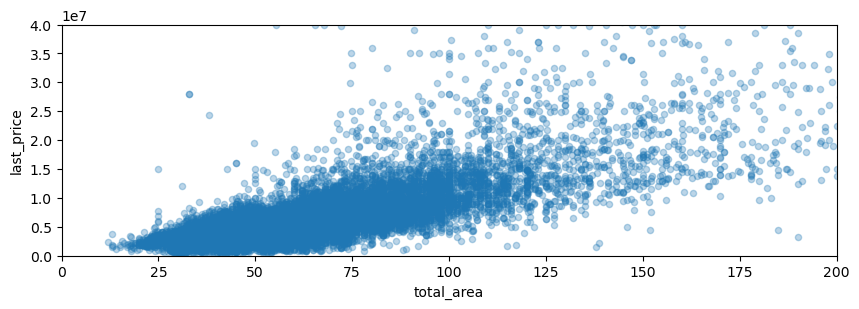

In [46]:
# анализируем зависимость общей стоимости объекта от площади
test = data[['total_area', 'last_price']].sort_values(by='total_area')
test.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, xlim=(0, 200), ylim=(0, 40000000), figsize=(10, 3))

Цена увеличивается с увеличением площади квартиры. Но разброс цен всё равно очень большой

<Axes: xlabel='living_area', ylabel='last_price'>

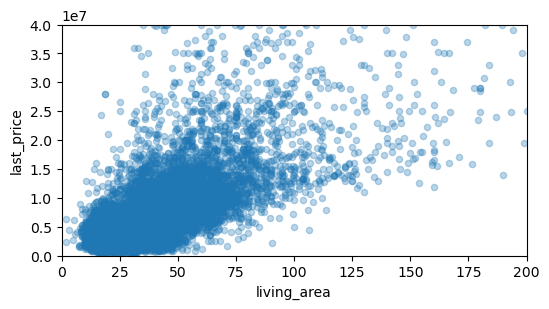

In [47]:
# анализируем зависимость общей стоимости объекта от жилой площади
test = data[['living_area', 'last_price']].sort_values(by='living_area')
test.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, xlim=(0, 200), ylim=(0, 40000000), figsize=(6, 3))

Цена увеличивается с увеличением жилой площади квартиры. Но разброс цен всё равно очень большой

<Axes: xlabel='kitchen_area', ylabel='last_price'>

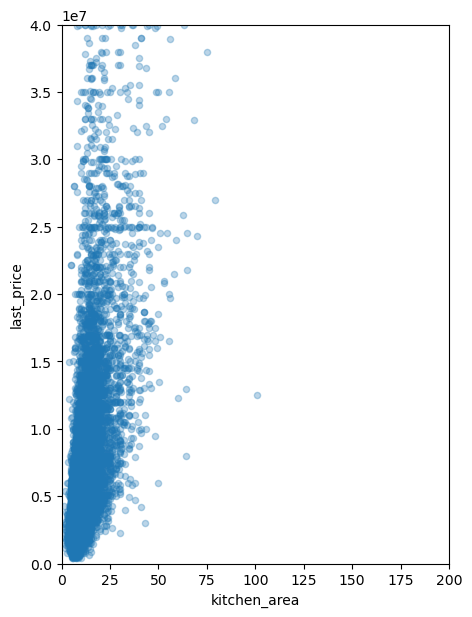

In [48]:
# анализируем зависимость общей стоимости объекта от площади кухни
test = data[['kitchen_area', 'last_price']].sort_values(by='kitchen_area')
test.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, xlim=(0, 200), ylim=(0, 40000000), figsize=(5, 7))

Цена квартиры не зависит от площади кухни

<Axes: xlabel='rooms'>

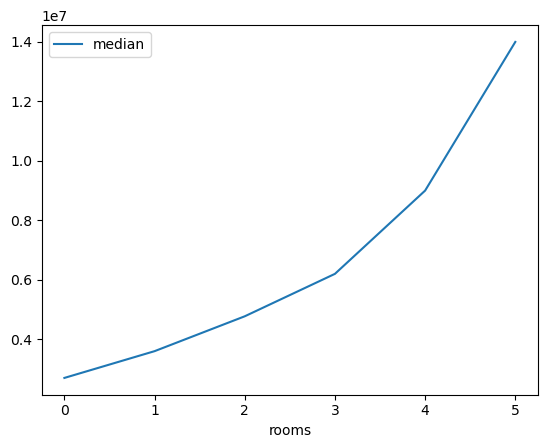

In [49]:
# анализируем зависимость общей стоимости объекта от количества комнат
rooms_group= data.groupby('rooms')['last_price'].agg(['median']).sort_values(by='rooms').reset_index()
rooms_group = rooms_group.query('rooms < 6')
rooms_group.plot(x='rooms', y='median')


С возрастанием количества комнат, растет цена квартиры

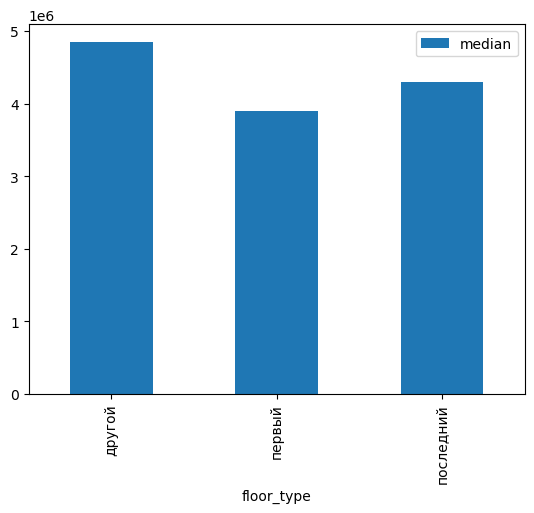

In [50]:
# анализируем зависимость общей стоимости объекта от этажа, на котором расположена квартира
floor_group= data.groupby('floor_type')['last_price'].agg(['median']).plot(kind='bar')

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


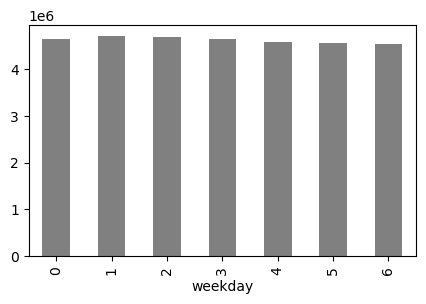

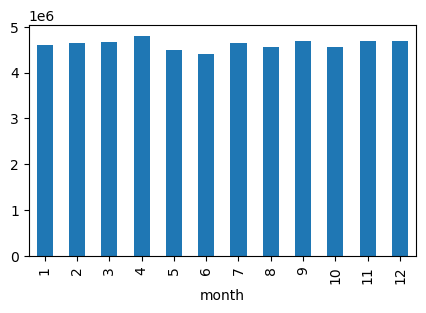

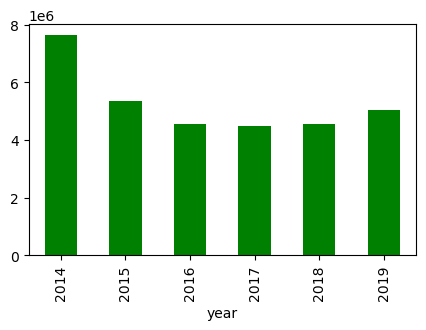

In [51]:
# анализируем зависимость общей стоимости объекта от даты рамещения
# день недели
print(data.pivot_table(index=['weekday'], values='last_price', aggfunc='median')
      .plot(kind='bar', figsize=(5, 3), color='grey', legend=False))
# месяц
print(data.pivot_table(index=['month'], values='last_price', aggfunc='median')
      .plot(kind='bar', figsize=(5, 3), legend=False))
# год
print(data.pivot_table(index=['year'], values='last_price', aggfunc='median')
      .plot(kind='bar', figsize=(5, 3), color='green', legend=False))

Значительной зависимости цены от дня недели и месяца размещения объявления нет.  
По годам пик стоиомсти квартир приходится на 2014 год, после которого идет постепенное снижение. И цена начинает увеличиваться только с 2018 года


### Проанализируем данные в разрезе населенных пунктов

In [52]:
# выбираем 10 населенных пунктов с наибольшим числом объявлений
locality = list(
    data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
    .sort_values('last_price',ascending=False)
    .reset_index().loc[:9, 'locality_name']
)

In [53]:
# отбираем населенные пункты с самой высокой и самой низкой стоимостью за квадратный метр
locality_ten = data.query('locality_name == @locality').groupby('locality_name')['meter_price'].mean().reset_index()
locality_ten[['meter_price']] = locality_ten[['meter_price']].astype('int')
locality_ten_max = locality_ten.max()
locality_ten_min = locality_ten.min()
print(f'Самая высокая стоимость квадратного метра в населенном пункте {locality_ten_max[0]} - {locality_ten_max[1]} рублей')
print(f'Самая низкая стоимость квадратного метра в населенном пункте {locality_ten_min[0]} - {locality_ten_min[1]} рублей')

Самая высокая стоимость квадратного метра в населенном пункте поселок Шушары - 114856 рублей
Самая низкая стоимость квадратного метра в населенном пункте Всеволожск - 58141 рублей


### Проанализируем данные по городу Санкт-Петербург

<Axes: xlabel='cityCenters_nearest'>

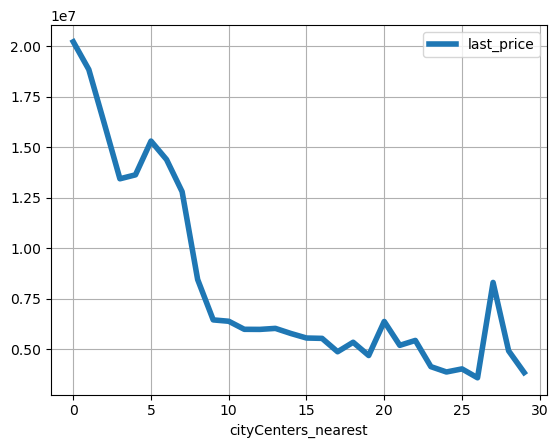

In [54]:
data.query('locality_name == "Санкт-Петербург"')\
.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')\
.reset_index().plot(x='cityCenters_nearest', y='last_price', linewidth=4, grid=True)

Несмотря на пиковые значения, цена квадратного метра в Санкт-Петербурге заметно снижается при удалении от центра города. Резкое снижение происходит до 8 км, потом более плавное. 